Load the required libraries.

In [68]:
library(readxl)
library(ggplot2)

Read the NHLTop100 file using read_excel.

In [69]:
Players <-read_excel("NHLTop100.xlsx")

Checking the class of the variable.

In [70]:
class(Players)

[1] "tbl_df"     "tbl"        "data.frame"

Checking the contents of the dataframe.

In [10]:
head(Players)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


Plotting a linear model between goals and assists and summarising it to get the P value and R-squared.

In [72]:
Lm_1 <- lm(A~G,data = Players)
s1 <- summary(Lm_1)
s1




Call:
lm(formula = A ~ G, data = Players)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


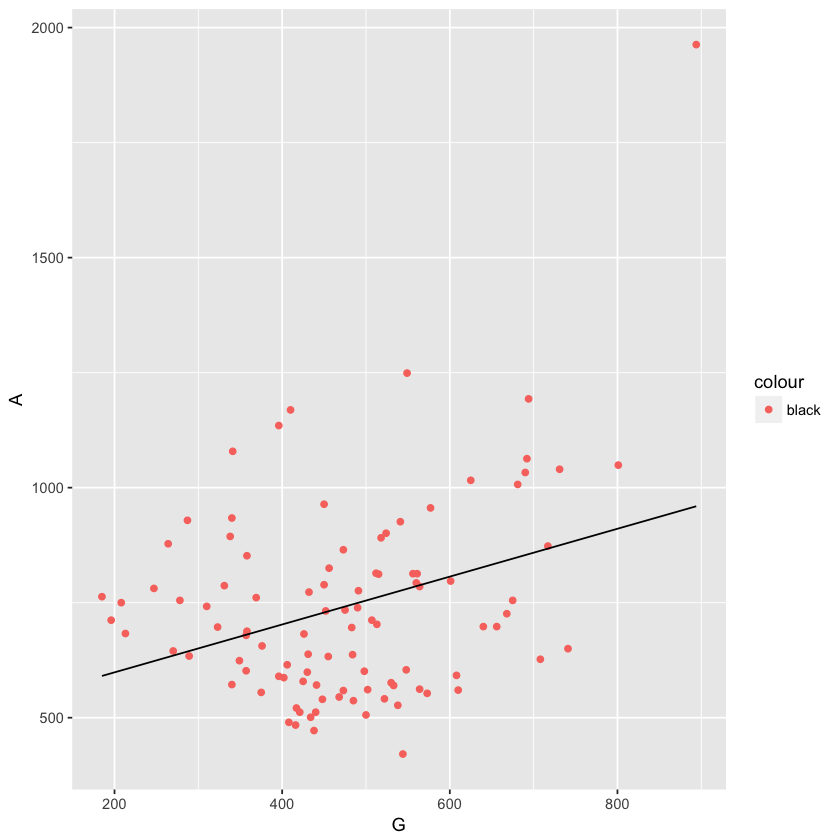

In [73]:
p1 <- ggplot(Players, aes(x = G, y = A))
p1 + geom_point(aes(colour= "black")) + 
    geom_line(aes(y = predict(Lm_1)))

We know from the above table that (Goals, Assists) of Wayne Gretzky = (894,1963)

In [74]:
x0 <- 894
y0 <- 1963
Lm_2 <- lm(I(A - y0) ~ I(G - x0), data = Players)
s2 <- summary(Lm_2)
s2




Call:
lm(formula = I(A - y0) ~ I(G - x0), data = Players)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - x0)       0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


Calculating slope.

In [75]:
l <- coef(Lm_2)
l
m = (y0-l[1])/x0

(Intercept)     I(G - x0) 
-1003.4220491     0.5202063

Plotting the linear model and forcing it to pass through Wayne.

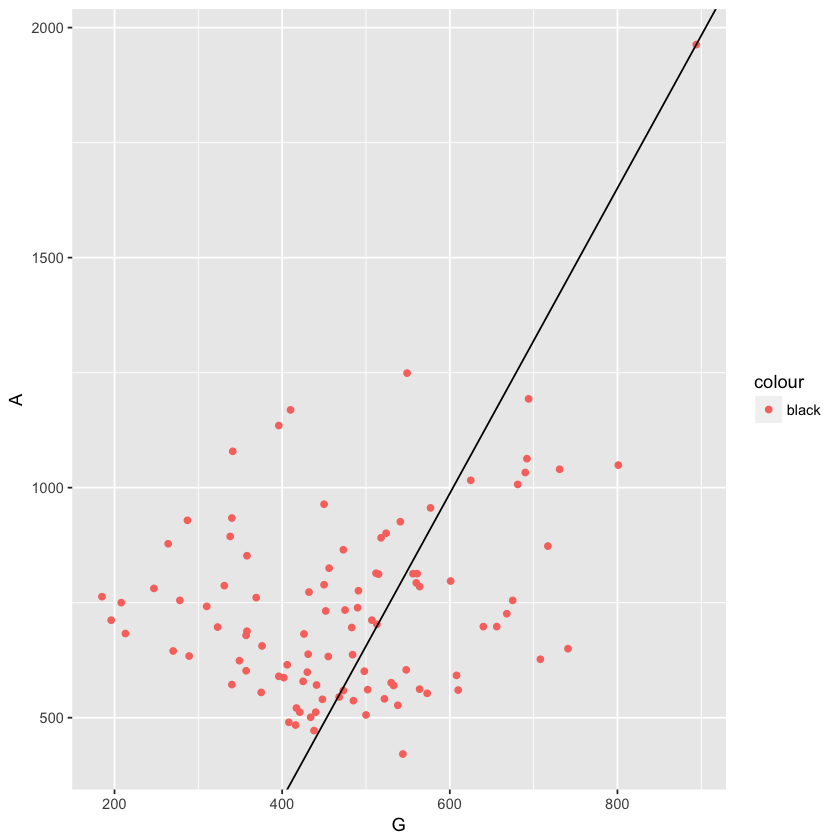

In [76]:
p2 <- ggplot(Players, aes(x = G, y = A))
p2 + geom_point(aes(colour= "black")) +
    geom_abline(intercept = l[1], slope = m) 


Adding values of Patrick Kane to the data frame and then calculating the linear model.

In [77]:
Players[101,7] =733
Players[101,8]=285
Players[101,9]=465
x0 <- 285
y0 <- 465
Lm_3 <- lm(I(A - y0) ~ I(G - x0), data = Players)
s3 <- summary(Lm_3)
s3





Call:
lm(formula = I(A - y0) ~ I(G - x0), data = Players)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 172.7210    34.8505   4.956 2.97e-06 ***
I(G - x0)     0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


Calculating slope.

In [78]:
l <- coef(Lm_3)
m = (y0-l[1])/x0

 Plotting the linear model and forcing it to pass through Patrick.

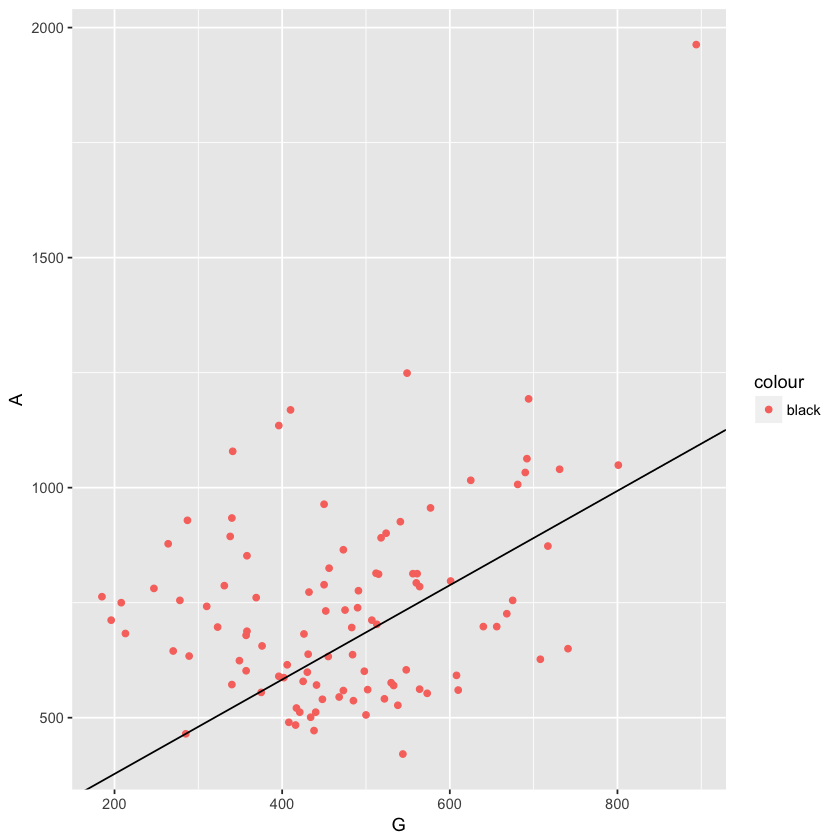

In [79]:
p3 <- ggplot(Players, aes(x = G, y = A))
p3 + geom_point(aes(colour= "black")) +
    geom_abline(intercept = l[1], slope = m) 




Plotting the linear model and forcing it to pass through origin.

In [80]:
Lm1_origin <- lm(A~G + 0,data = Players)
s1_origin <- summary(Lm1_origin)
s1_origin


Call:
lm(formula = A ~ G + 0, data = Players)

Residuals:
    Min      1Q  Median      3Q     Max 
-447.30 -137.15    3.59  157.86  639.13 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48083    0.04977   29.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16


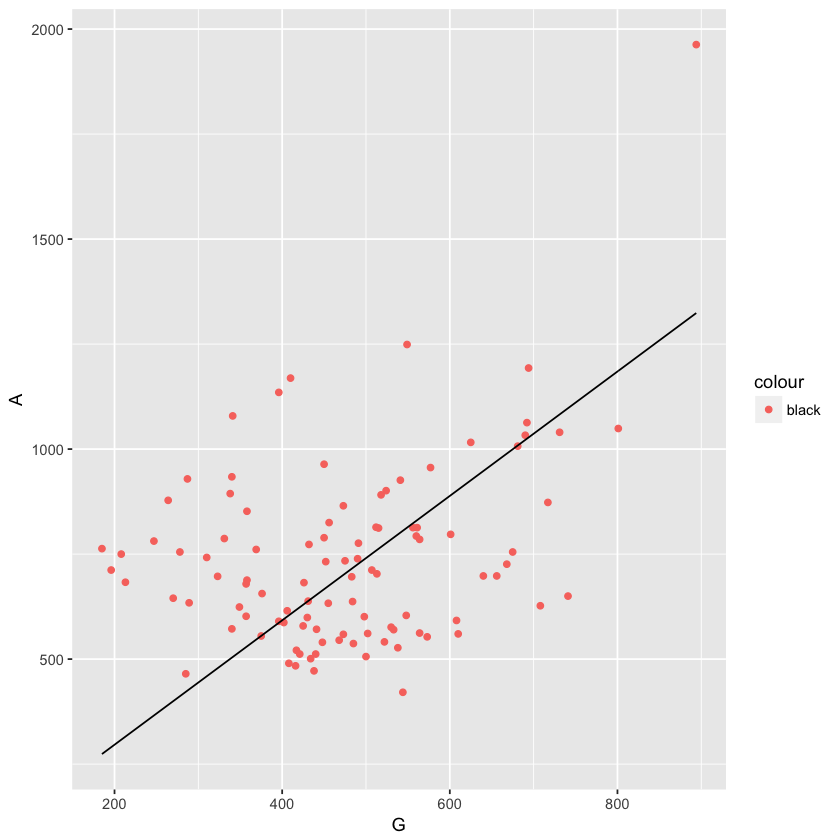

In [50]:
p1 <- ggplot(Players, aes(x = G, y = A))
p1 + geom_point(aes(colour= "black")) + 
    geom_line(aes(y = predict(Lm1_origin)))

Plotting the linear model and forcing it to pass through Wayne and origin.

In [102]:
x0 <- 894
y0 <- 1963
Lm2_origin <- lm(I(A - y0) ~ I(G - x0) + 0, data = Players)
s2_origin <- summary(Lm2_origin)
s2_origin




Call:
lm(formula = I(A - y0) ~ I(G - x0) + 0, data = Players)

Residuals:
   Min     1Q Median     3Q    Max 
-902.9 -329.7 -141.1  121.8  700.4 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
I(G - x0)  2.68044    0.08412   31.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 374.1 on 100 degrees of freedom
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.9094 
F-statistic:  1015 on 1 and 100 DF,  p-value: < 2.2e-16


In [103]:
l <- coef(Lm2_origin)
m = (y0-l[1])/x0
l[1]

I(G - x0) 
 2.680445

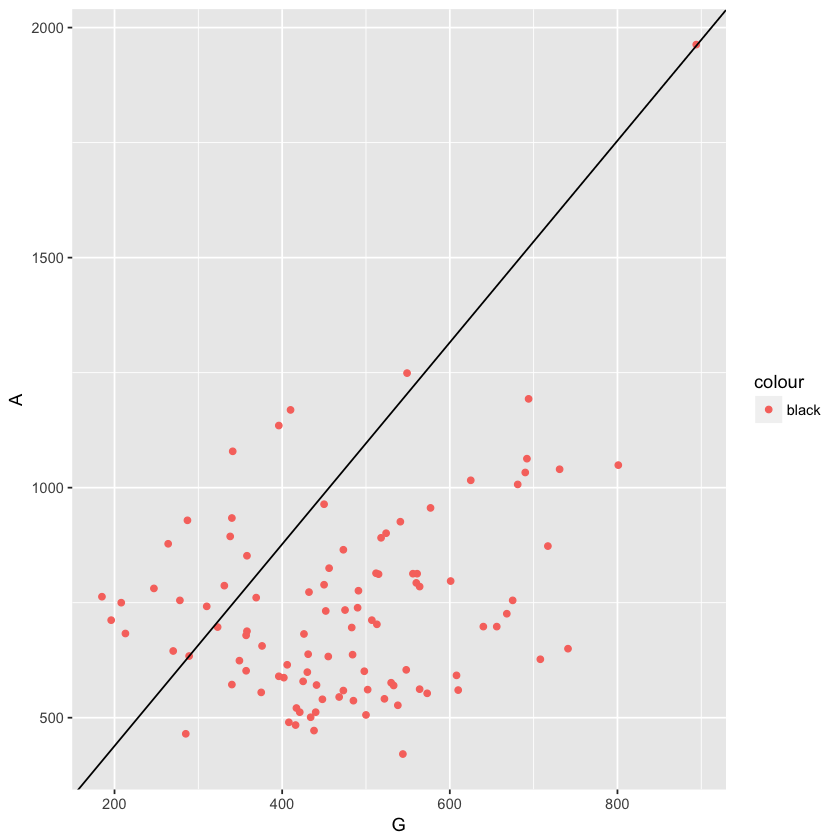

In [105]:
p2 <- ggplot(Players, aes(x = G, y = A))
p2 + geom_point(aes(colour= "black")) +
    geom_abline(slope = m) 



Plotting the linear model and forcing it to pass through Patrick and origin.

In [110]:
x0 <- 285
y0 <- 465
Lm3_origin <- lm(I(A - y0) ~ I(G - x0) + 0, data = Players)
s3_origin <- summary(Lm3_origin)
s3_origin




Call:
lm(formula = I(A - y0) ~ I(G - x0) + 0, data = Players)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
I(G - x0)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


In [111]:
l <- coef(Lm3_origin)
m = (y0-l[1])/x0

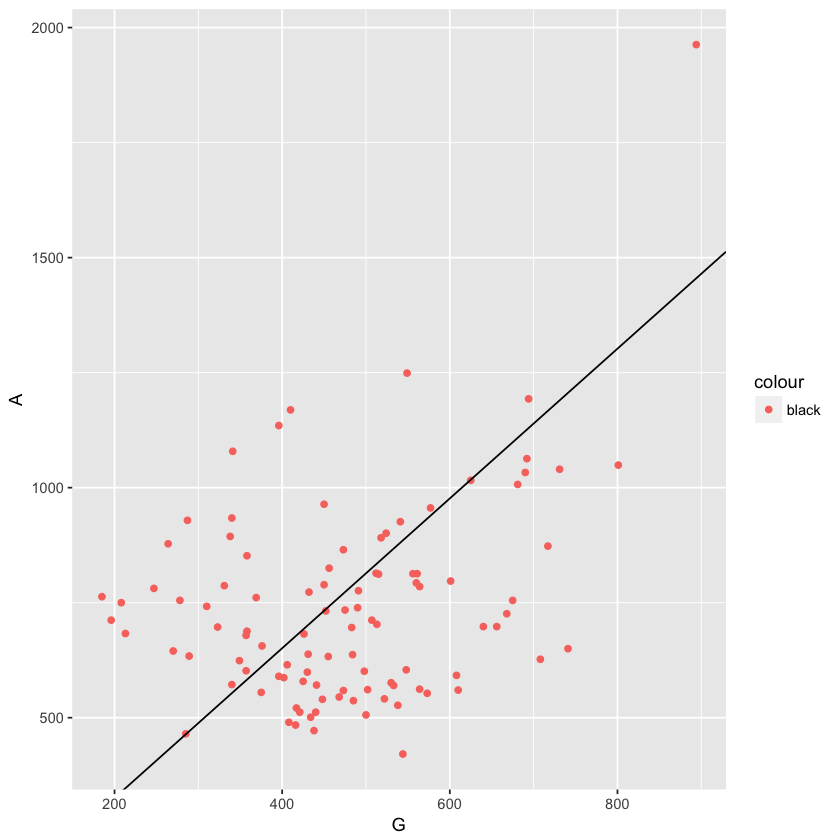

In [112]:
p3 <- ggplot(Players, aes(x = G, y = A))
p3 + geom_point(aes(colour= "black")) +
    geom_abline(slope = m) 



Getting the r squared and p values into a table.

In [108]:
table <- data.frame(s1$r.squared,s1$coefficients[2,4])
table <- rbind(table,c(s2$r.squared,s2$coefficients[2,4]))
table <- rbind(table,c(s3$r.squared,s3$coefficients[2,4]))
table <- rbind(table,c(s1_origin$r.squared,s1_origin$coefficients[1,4]))
table <- rbind(table,c(s2_origin$r.squared,s2_origin$coefficients[1,4]))
table <- rbind(table,c(s3_origin$r.squared,s3_origin$coefficients[1,4]))
               names(table) <- c("R-squared", "P-value")


Adding row names

In [114]:
row.names(table) <- c("Default","Wayne","Patrick","Default Origin","Wayne Origin","Patrick Origin")

Summarising

In [115]:
table

,R-squared,P-value
Default,0.1082305,8.317169e-04
Wayne,0.1082305,8.317169e-04
Patrick,0.1159517,4.934439e-04
Default Origin,0.8985224,1.746312e-51
Wayne Origin,0.9103339,3.566492e-54
Patrick Origin,0.5731817,3.394245e-20
